In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def f(u1, u2, u3):

    k1 = 0.04
    k2 = 1e4
    k3 = 3e7

    f1 = -k1*u1 + k2*u2*u3
    f2 = k1*u1 - k2*u2*u3 - k3*(u2**2)
    f3 = k3*(u2**2)

    return f1, f2, f3

In [12]:
def FE(u1, u2, u3):
    u1, u2, u3 = [1], [0], [0]

    h1 = 0.0001
    tf = 1000
    nT = int(tf/h1)
    T = [0]

    for i in range(nT):
        f1, f2, f3 = f(u1[-1], u2[-1], u3[-1])

        u1.append(u1[-1] + h1*f1)
        u2.append(u2[-1] + h1*f2)
        u3.append(u3[-1] + h1*f3)
        T.append(T[-1] + h1)

    return T, u1, u2, u3

[]

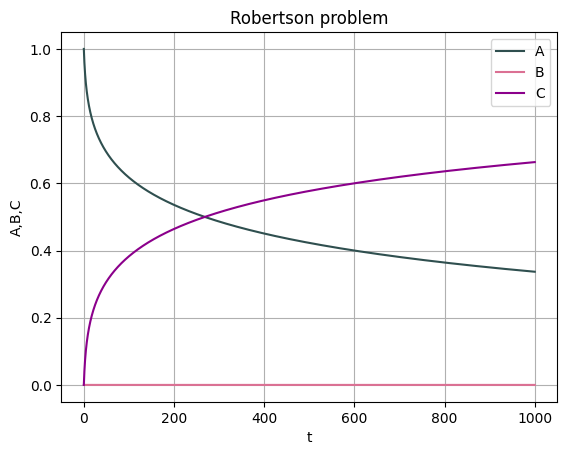

In [13]:
T, u1, u2, u3 = FE(1, 0 ,0)

plt.plot(T, u1, color='darkslategray', label='A')
plt.plot(T, u2, color='palevioletred', label='B')
plt.plot(T, u3, color='darkmagenta', label='C')
plt.legend()
plt.xlabel('t')
plt.ylabel('A,B,C')
plt.title('Robertson problem')
plt.grid()
plt.plot()

In [14]:
def robertson(u, T, k1, k2, k3):
    du1 = -k1 * u[0] + k2 * u[1] * u[2]
    du2 = k1 * u[0] - k2 * u[1] * u[2] - k3 * u[1]**2
    du3 = k3 * u[1]**2
    return np.array([du1, du2, du3])

def Jac(u, T, k1, k2, k3):
    J = [[-k1, k2*u[2], k2*u[1]],
         [k1, (k2*u[2])-(2*k3*u[1]), -k2*u[1]],
         [0, 2*k3*u[1], 0]]
    return np.linalg.eigvals(np.array(J))

def FE_Jac(u0, N, k1, k2, k3, h=0.0001):
    u = [u0]
    eigw = []
    for i in range(1, N):
        u_1 = u[i-1] + h * robertson(u[i-1], i, k1, k2, k3)
        u.append(u_1)
        if i in T:
            eigw.append(Jac(u_1, i, k1, k2, k3))
    return eigw

N = 1000000
h = 0.0001
T = [1, 10, 100, 1000]
eigw = FE_Jac([1,0,0], N, 0.04, 1e4, 3e7)
for i, array in enumerate(eigw):
    for j, value in enumerate(array):
        print(f'T = {T[i]}, λ{j+1} = {value}')

T = 1, λ1 = -239.959986659996
T = 1, λ2 = 1.0329674239878838e-17
T = 1, λ3 = -0.08001334000407687
T = 10, λ1 = -1795.598104522348
T = 10, λ2 = -1.9418216692871338e-16
T = 10, λ3 = -0.33940414591816626
T = 100, λ1 = -2183.034794744086
T = 100, λ2 = -1.5311215598136303e-16
T = 100, λ3 = -0.40511183529857336
T = 1000, λ1 = -2109.032294724503
T = 1000, λ2 = 3.30703240794944e-17
T = 1000, λ3 = -0.4039731849745849
